In [18]:
import random
from numpy import random, array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [23]:
'''
So let's pretend there's some real fundamental relationship between these data
and there are some real natural clusters that exist in it.

And it takes N, I want to create clusters of N people in K clusters
'''
def createClusteredData(N,k):
    random.seed(10)
    pointsPerCluster=float(N)/k
    X=[]
    '''
    So for each cluster, for I in range K, I am going to create some random centroid of income between 20,000 and 200,000 dollars
    and some random centroid of age between the age of 20 and 70.

    So what I'm doing here is creating a fake scatterplot that will show income versus age for N people in K clusters.
    '''
    for i in range(k):
        incomeCentroid=np.random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range (int(pointsPerCluster)):
            '''
            So for each random centroid that I created, I'm then going to create a normally distributed set of random data with a standard deviation
            of 10,000 in income and a standard deviation of 2 in age and that will give me back a bunch of age, income data that is clustered into some preexisting
            clusters that I chose at random.
            '''
            X.append([np.random.normal(incomeCentroid,10000.0),np.random.normal(ageCentroid, 2.0)])
    X=array(X)
    return X


In [30]:
'''
So I'm gonna use my create cluster data function to say I want 100 random people around five clusters.

So there are five natural clusters from the data that I'm creating.
'''
data = createClusteredData(1000, 5)

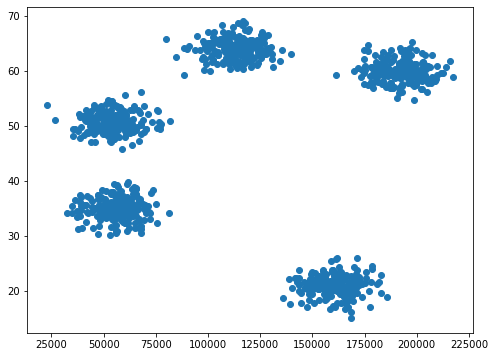

In [31]:
#So what I'm doing here is creating a fake scatterplot that will show income versus age for N people in K clusters.
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1])
plt.show()

In [33]:
#We’ll use k-means to rediscover these clusters in unsupervised learning:
'''
So I am picking five clusters cause I know that's the right answer, but again in unsupervised
learning you don't necessarily know what the real value of K is, you need to iterate
and converge on it yourself
'''

'''
I'm then going to create a model, a K-means model, with a K = 5.
'''
model=KMeans(n_clusters=5)

In [34]:
# Note I'm scaling the data to normalize it! Important for good results.
'''
And then I can just call a model.fit using my K-means model using the data that I had.

Now scale I alluded to earlier, that's normalising the data and one important
thing with K-Means is that it works best if your data is all normalised.

That means everything is at the same scale.

So a problem that I have here is that my ages range from 20 to 70 but my incomes
range all the way up to 200,000. So these values are not really comparable.
The incomes are much larger than the age values.

Scale will take all that data and scale it together to a consistent scale
'''
model.fit(scale(data))

KMeans(n_clusters=5)

In [35]:
'''
So once I've actually called fit on my model

I have a model and I can actually look at the resulting labels that I got.
'''
# We can look at the clusters each data point was assigned to
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

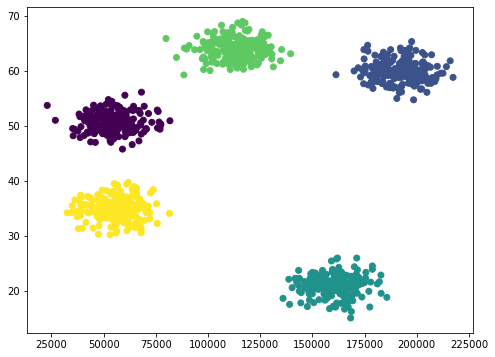

In [36]:
'''
And then we can actually visualise it using this little bit of matplotlib magic.

You can see here I have a little trick here where I assign the colour to the labels
that I ended up with converted to some floating point number.
'''

'''
You can see the results here are basically what clusters I assigned everything into.

And you can see, you know that our fake data is already pre-clustered.

'''
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1],c=model.labels_.astype(float))
plt.show()